# HW1 Additional Problem

In homework 1, you applied the techniques discussed in lecture to perform correspondance based 3d reconstruction. Using Singular Value Decomposition (SVD) along with provided 2d/3d corrsepondance labels, you were able to determine projection matrices and a point cloud reconstruction of a provided set of images.

In this problem, you will extend on the techniques shown in lecture to demonstrate the tradeoffs of other approaches to the same problem. Additionally, you will learn to use an existing state of the art correpondance network (Dust3r/Mast3r) in order to learn how researchers currently attempt this problem!

In [1]:
# First install required package
from google.colab import output
output.enable_custom_widget_manager()


# Initial setup
Copy & paste your `calculate_reprojection_error` and `calculate_projection` functions into the cell below. Additionally, copy and paste your code for calculating the design matrix $A$ into the function `create_design_matrix` into the provided function stub below (note: this is just the code you used in `calculate_projection_matrix` to compute the A matrix). It is reccomended to modify your `calculate_projetion` function to get $A$ from the `create_design_matrix` function result instead of calculating it in the main function body.

Additionally, make sure to run the cell provided that downloads the HW1 data from drive

In [2]:
# Download the HW1 data and unzip
!wget "https://drive.google.com/uc?export=download&id=1rmAt35Gu9VC8xp9dDTHiCRhaailVAJWD" -O HW1.zip
!unzip HW1.zip
!unzip HW1/src/data.zip
!rm HW1.zip
!rm -rf HW1
!rm -rf __MACOSX/

--2025-02-13 19:10:50--  https://drive.google.com/uc?export=download&id=1rmAt35Gu9VC8xp9dDTHiCRhaailVAJWD
Resolving drive.google.com (drive.google.com)... 172.217.194.138, 172.217.194.100, 172.217.194.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.194.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1rmAt35Gu9VC8xp9dDTHiCRhaailVAJWD&export=download [following]
--2025-02-13 19:10:50--  https://drive.usercontent.google.com/download?id=1rmAt35Gu9VC8xp9dDTHiCRhaailVAJWD&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.12.132, 2404:6800:4003:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5002799 (4.8M) [application/octet-stream]
Saving to: ‘HW1.zip’

HW1.zip             100%[===================>]   4.77M  17.3MB/s   

In [2]:
import cv2
import os
import sys
import numpy as np
import time
import scipy

def create_design_matrix(pts2d, pts3d):
    """
    Compute the 12x2N design matrix M using a set of N 2D-3D point correspondences.

    This is the same matrix you used in homework 1 to run SVD on and is equivalent
    to the A matrix in the least squares equations.

    Parameters:
    pts2d (numpy.ndarray): An Nx2 array containing the 2D image points.
    pts3d (numpy.ndarray): An Nx3 array containing the corresponding 3D world coordinates.

    Returns:
    A (numpy.ndarray): A 12x(2N) design matrix for the projection matrix least-squares problem
    """
    A = None
    ####################################
    ##########YOUR CODE HERE############
    ### COPY FROM YOUR SOLUTION TO P1 ##
    ####################################

    ####################################
    ##########YOUR CODE HERE############
    ####################################

    # Following this video: https://www.youtube.com/watch?v=GUbWsXU1mac (Time Stamp)

    # Ap = 0

    # p is the 12*1 projection matrix vector, and A is 2N*12 matrix, N is the number of points
    # The even index of A solve for the equation that combines the 3D points to the u coordinate of the 2D points
    # The odd index of A solve for the equation that combines the 3D points to the v coordinate of the 2D points

    A = np.zeros((2*pts2d.shape[0], 12))


    # populating even rows [idx 0, 2, 4....]
    for i in range(0, 2*pts2d.shape[0], 2):
        A[i, 0] = pts3d[i//2, 0]
        A[i, 1] = pts3d[i//2, 1]
        A[i, 2] = pts3d[i//2, 2]
        A[i, 3] = 1
        A[i, 8] = -pts2d[i//2, 0]*pts3d[i//2, 0]
        A[i, 9] = -pts2d[i//2, 0]*pts3d[i//2, 1]
        A[i, 10] = -pts2d[i//2, 0]*pts3d[i//2, 2]
        A[i, 11] = -pts2d[i//2, 0]

    # populating odd rows [idx 1, 3, 5....]
    for i in range(1, 2*pts2d.shape[0], 2):
        A[i, 4] = pts3d[i//2, 0]
        A[i, 5] = pts3d[i//2, 1]
        A[i, 6] = pts3d[i//2, 2]
        A[i, 7] = 1
        A[i, 8] = -pts2d[i//2, 1]*pts3d[i//2, 0]
        A[i, 9] = -pts2d[i//2, 1]*pts3d[i//2, 1]
        A[i, 10] = -pts2d[i//2, 1]*pts3d[i//2, 2]
        A[i, 11] = -pts2d[i//2, 1]


    ####################################

    return A

def calculate_projection(pts2d, pts3d):
    """
    Compute a 3x4 projection matrix M using a set of 2D-3D point correspondences.

    Given a set of N 2D image points (pts2d) and their corresponding 3D world coordinates
    (pts3d), this function calculates the projection matrix M using the Direct Linear
    Transform (DLT) method. The projection matrix M relates the 3D world coordinates to
    their 2D image projections in homogeneous coordinates.

    Parameters:
    pts2d (numpy.ndarray): An Nx2 array containing the 2D image points.
    pts3d (numpy.ndarray): An Nx3 array containing the corresponding 3D world coordinates.

    Returns:
    M (numpy.ndarray): A 3x4 projection matrix M that relates 3D world coordinates to 2D
                   image points in homogeneous coordinates.
    """
    M = None
    A = create_design_matrix(pts2d, pts3d)
    ####################################
    ##########YOUR CODE HERE############
    ####################################
    ####################################
    ##########YOUR CODE HERE############
    ####################################

    # Following this video: https://www.youtube.com/watch?v=GUbWsXU1mac (Time Stamp)

    # Ap = 0

    # p is the 12*1 projection matrix vector, and A is 2N*12 matrix, N is the number of points
    # The even index of A solve for the equation that combines the 3D points to the u coordinate of the 2D points
    # The odd index of A solve for the equation that combines the 3D points to the v coordinate of the 2D points

    # Solve for the projection matrix
    _, _, V = np.linalg.svd(A)

    # The projection matrix is the last column of V
    M = V[-1].reshape(3, 4)

    ####################################
    return M

def calculate_reprojection_error(pts2d, pts3d, M):
    """
    Calculate the reprojection error for a set of 2D-3D point correspondences.

    Given a set of N 2D image points (pts2d) and their corresponding 3D world coordinates
    (pts3d), this function calculates the reprojection error. The reprojection error is a
    measure of how accurately the 3D points project onto the 2D image plane when using a
    projection matrix.

    Parameters:
    pts2d (numpy.ndarray): An Nx2 array containing the 2D image points.
    pts3d (numpy.ndarray): An Nx3 array containing the corresponding 3D world coordinates.

    Returns:
    float: The reprojection error, which quantifies the accuracy of the 3D points'
           projection onto the 2D image plane.
    """
    error = None
    ####################################
    ##########YOUR CODE HERE############
    ### COPY FROM YOUR SOLUTION TO P1 ##
    ####################################

    # use the 3*4 projection matrix M to project the N * 4 3D world coordinates

    pts3d_homogeneous = np.hstack((pts3d, np.ones((pts3d.shape[0], 1))))
    # import pdb; pdb.set_trace()
    pts2d_predicted = np.dot(M, pts3d_homogeneous.T).T

    # last column of the predicted 2D points are the homogeneous coordinates, divide by the last column
    pts2d_predicted = pts2d_predicted / pts2d_predicted[:, 2].reshape(-1, 1)

    # Calculate the error
    pts2d_predicted = pts2d_predicted[:, :2]

    error = np.linalg.norm(pts2d - pts2d_predicted, axis=1)

    error = np.mean(error)

    ####################################
    return error

In [3]:
def get_b(pts2d):
  # define column vector b
  n = len(pts2d)
  b = np.zeros((2*n, 1))

  for i in range(len(pts2d)):
    u, v = pts2d[i]
    b[2*i] = u
    b[2*i+1] = v

  return b


def get_condition_number(A):
  return np.linalg.cond(A)

# Other Approaches to Solving least squares problems

Assuming we have an problem like in Homework 1 in the form $Ax = b$, there are many other closed form solutions to solving the least-squares solution for $x$! We will write three versions in this assignment and characterize their outputs:


1.   Moore-Penrose Pseudoinverse
2.   QR Decomposition
3.   LU Decomposition

## Moore-Penrose Pseudoinverse

[The Moore-Penrose Pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) is a fundamental approach to finding a vector $x$ of minimum norm that solves least-squares problems $Ax=b$. It is commonly derived via [Projection Theorem](https://en.wikipedia.org/wiki/Hilbert_projection_theorem) (and note: if you have taken ROB501 you will almost certainly have had to do so already!), but a quick geometric derivation is as follows:


**Theorem 1:**Every linear system $Ax=b$ where $A$ is a matrix of size $[m,n]$ has a unique least-squares solution $x^{+}$ of smallest norm.
1. Interpret $b$ as a point in Euclidean space of proper dimensionality (e.g. $b \in \mathbb{R}^m$) - this means that the column space of $A$ is a subspace $U$ of $\mathbb{R}^m$
2. If we have a subspace $U ⊂ V$ (for any $U$ or $V$), we can reform $V$ as the union of $U$ and its orthogonal subspace $U^{\perp}$
$$V = U \oplus U^{\perp}$$
Less formally, this means that we can form any member $v$ of space $V$ as the combination of a member $u$ of subspace $U$ and $v$'s orthogonal projection onto $U$.
3. Relating back to our problem, this means that $x$ minimizes $\lVert Ax-b \rVert_{2}$ iff $b-Ax$ is orthogonal to every column of $A$.
4. This is equivalent to saying that $A^{T}(b-Ax)=0$. Rearranging this equation gets us our solution to the least-squares problem, dubbed the **Moore-Penrose Pseudoinverse**:

$$x^{+} = (A^{T}A)^{-1}A^{T}b$$


###Problem 7.1
Just as before in HW1, you will be writing a function `calculate_projection_pseudoinverse` to solve for the projection matrix given a set of 2d/3d correspondances. You should use the same design matrix $A$ as in the SVD solution here, as well as your code for calculating the reprojection error.

In [5]:
def calculate_projection_pseudoinverse(pts2d, pts3d):
    """
    Compute a 3x4 projection matrix M using a set of 2D-3D point correspondences.

    Given a set of N 2D image points (pts2d) and their corresponding 3D world coordinates
    (pts3d), this function calculates the projection matrix M using the Moore-Penrose pseudo inverse

    Parameters:
    pts2d (numpy.ndarray): An Nx2 array containing the 2D image points.
    pts3d (numpy.ndarray): An Nx3 array containing the corresponding 3D world coordinates.

    Returns:
    M (numpy.ndarray): A 3x4 projection matrix M that relates 3D world coordinates to 2D
                   image points in homogeneous coordinates.
    """
    A = create_design_matrix(pts2d, pts3d)
    M = None

    A = A[:, :11]
    ####################################
    ##########YOUR CODE HERE############
    ####################################

    # define column vector b
    b = get_b(pts2d)

    # import pdb; pdb.set_trace()

    x = np.linalg.inv(A.T @ A) @ A.T @ b

    x = np.append(x, 1)

    M = x.reshape(3, 4) #np.vstack((x.reshape(3, 4), [0, 0, 0, 1]))



    ####################################

    return M

## QR Decomposition

[QR Decomposition](https://en.wikipedia.org/wiki/QR_decomposition) is another way of solving for least squares solutions. In QR decomposition, we decompose a matrix $A$ into two matrices $Q$ and $R$, where $Q$ is an orthonormal matrix (e.g. has a mmagnitude of 1 and each column is orthogonal to each other) and $R$ is an upper triangular matrix. We can compute $Q$ via several methods, such as the [Gram-Schmidt process](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process), and because R is upper triangular, it can be easily computed via [substitution algorithms](https://en.wikipedia.org/wiki/Triangular_matrix#Forward_and_back_substitution). For the purposes of this assignment, you may use the implementation of QR decomposition [provided by numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html).

The advantage of QR decomposition is that we do not need to solve $(A^TA)^{-1}$ directly! Matrix inversions are quite expensive, so if we can avoid them that is preferrable. We can show that QR solves the least squares problem by starting from the pseudoinverse as follows:


**Theorem 2:**The solutions to the least squares system $\lVert Ax-b \rVert_{2}$ derived from QR Decomposition and the Moore-Penrose Pseudoinverse are equivalent.
1. Starting from the pseudoinverse equations, we have our least squares solution:

$$x^{+} = (A^{T}A)^{-1}A^{T}b$$

2. Performing QR decomposition on $A$ and substituting yields the following:

$$x^{+} = ((QR)^{T}QR)^{-1}(QR)^{T}b = (R^TQ^TQR)^{-1}Q^TR^Tb$$

3. Because Q is orthonormal, $Q^TQ=I$, which gives us:
$$x^{+} = (R^TR)^{-1}R^TQ^Tb = R^{-1}(R^T)^{-1}R^TQ^Tb$$
4. Cancelling terms, we then obtain
$$ x^{+} = R^{-1}Q^Tb $$

Although we still see $R^{-1}$ in this equation, we can solve this via backward substitution because $R$ is upper triangular! If $R$ is of shape `[m,n]` this then becomes of complexity $O((m*n)/2)$ as opposed to the $O((m*n)^3)$ of matrix inversion! Pseudocode for performing back substitution is as follows:


```
# given the QR decomposition of A
# where Q is an [m,n] orthogonal matrix
# R is an [n,n] upper triangular matrix
# and b is from our Ax=b least squares equation

def backsubstitution(Q, R, b):
  qt_b = matmul(transpose(Q), b)
  M = zeros(n)
  for i in [m, 0]:
    M[i] = qt_b[i] - dot( R[i][i+1:n], M[i+1:m]) / R[i,i]

  return M
```

###Problem 7.2
As before in HW1, you will be writing a function `calculate_projection_QR` to solve for the projection matrix given a set of 2d/3d correspondances. You should use the same design matrix $A$ as before, but find the solution via QR decomposition and back substitution (do not just invert R or use the numpy solver!).

In [6]:
def backsubstitution(Q, R, b):
    qt_b = np.matmul(Q.T, b)
    n = R.shape[1]
    m = R.shape[0]
    M = np.zeros(n)

    for i in range(m-1, -1, -1):
        M[i] = (qt_b[i] - np.dot(R[i, i+1:n], M[i+1:n])) / R[i, i]

    return M

def calculate_projection_QR(pts2d, pts3d):
    """
    Compute a 3x4 projection matrix M using a set of 2D-3D point correspondences.

    Given a set of N 2D image points (pts2d) and their corresponding 3D world coordinates
    (pts3d), this function calculates the projection matrix M using QR

    Parameters:
    pts2d (numpy.ndarray): An Nx2 array containing the 2D image points.
    pts3d (numpy.ndarray): An Nx3 array containing the corresponding 3D world coordinates.

    Returns:
    M (numpy.ndarray): A 3x4 projection matrix M that relates 3D world coordinates to 2D
                   image points in homogeneous coordinates.
    """

    A = create_design_matrix(pts2d, pts3d)

    A = A[:, :11]

    M = None
    ####################################
    ##########YOUR CODE HERE############
    ####################################

    Q, R = np.linalg.qr(A)

    b = get_b(pts2d)

    x = backsubstitution(Q, R, b)

    x = np.append(x, 1)

    M = x.reshape(3, 4) #np.vstack((x.reshape(3, 4), [0, 0, 0, 1]))

    ####################################
    return M

## LU Decomposition

[LU Decomposition](https://en.wikipedia.org/wiki/LU_decomposition) is another way of solving for least squares solutions, although it is typically targeted at solving exact equations (instead of norm minimization). In LU decomposition, we decompose a matrix $A$ into two matrices $L$ and $U$, where $L$ is a lower triangular matrix and $U$ is an upper triangular matrix. For the purposes of this assignment, you may use the implementation of LU decomposition [provided by scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html).

Like QR decomposition, we are trying to avoid computing $(A^TA)^{-1}$ directly. Unlike QR decomposition however, we solve this directly using both forward and backwards substitution, leveraging the triangular nature of the matrices. The derivation steps for the LU least squares solution are below


**Theorem 3:**The solutions to the least squares system $\lVert Ax-b \rVert_{2}$ can be derived via LU substitution starting at the pseudo inverse.

1. Starting from the pseudoinverse equations, we have our least squares solution:

$$x = (A^{T}A)^{-1}A^{T}b$$

in normal equation form:
$$A^TAx = A^Tb$$

2. We then perform LU decomposition on $A^TA$.

$$LUx = A^Tb$$

3. We then use an intermediate variable $y$ and solve for it via forward substitution

$$Ly = A^Tb$$

4. Finally, we obtain $x$ using the same backward substitution technique in QR decomposition from the following equation.

$$Ux = y$$

Like QR decomposition, we leverage subsitution methods here to avoid directly computing inverses. Pseudocode for forward substitution is shown below, and is very similar to the backwards substitution code from before. You will need to adapt your backwards substitution code as well to take in the `U` and `y` instead of `Q`, `R`, and `b` (or you can generalize your backward substitution code into a single function for both methods).


```
# given the L component of the LR decomposition of A
# and b which is from our Ax=b least squares equation
# where L is of shape [n,n]
# and b is of shape [n]

def forward_substituion(L, b):
  y = zeros(n)

  for i in [0, n]:
    y[i] = b[i] - dot(L[i][0:i], y[0:i])

  return y
```

###Problem 7.3
Write a function `calculate_projection_LU` to solve for the projection matrix given a set of 2d/3d correspondances. You should use the same design matrix $A$ as before, but find the solution via LU decomposition and forward/back substitution (do not just invert the matrices or use the numpy solver!).

In [7]:
import scipy

def backsubstitution_LU(U, y):

    # solving for U.inv * Y
    qt_b = y
    n = U.shape[1]
    m = U.shape[0]
    M = np.zeros(n)

    for i in range(m-1, -1, -1):
        M[i] = (qt_b[i] - np.dot(U[i, i+1:n], M[i+1:n])) / U[i, i]

    return M

def forward_substitution(L, b):
    n = L.shape[0]
    y = np.zeros(n)

    for i in range(n):
        # print(L[i, :i].shape)
        # print(y[:i].shape)
        # print("**************")
        y[i] = b[i] - np.dot(L[i, :i], y[:i])

    return y

def calculate_projection_LU(pts2d, pts3d):
    """
    Compute a 3x4 projection matrix M using a set of 2D-3D point correspondences.

    Given a set of N 2D image points (pts2d) and their corresponding 3D world coordinates
    (pts3d), this function calculates the projection matrix M using LU decomposition

    Parameters:
    pts2d (numpy.ndarray): An Nx2 array containing the 2D image points.
    pts3d (numpy.ndarray): An Nx3 array containing the corresponding 3D world coordinates.

    Returns:
    M (numpy.ndarray): A 3x4 projection matrix M that relates 3D world coordinates to 2D
                   image points in homogeneous coordinates.
    """
    A = create_design_matrix(pts2d, pts3d)
    A = A[:, :11]  # Exclude p_{34} (fixed to 1)
    b = get_b(pts2d)

    # LU decomposition with permutation
    P, L, U = scipy.linalg.lu(A.T @ A)

    # Apply permutation to b: PA^TA = LU => A^TA x = P^T L U x = b
    b_permuted = P.T @ (A.T @ b)

    y = forward_substitution(L, b_permuted)
    x = backsubstitution_LU(U, y)
    x = np.append(x, 1)  # Add fixed p_{34} = 1

    return x.reshape(3, 4)

###Problem 7.4

We will now compare the execution time and reprojection errrors of these new methods on our original projection matrix problem. Examine the results, and provide some analysis discussing what the results are and why that may be the case.

In [8]:
data = np.load("data/camera_calib_data.npz")
pts2d = data['pts2d']
pts3d = data['pts3d']

qr_start = time.perf_counter_ns()
P_qr = calculate_projection_QR(pts2d,pts3d)
qr_end = time.perf_counter_ns()
print(f"qr_start: {qr_start}, qr_end: {qr_end}")

svd_start = time.perf_counter_ns()
P = calculate_projection(pts2d,pts3d)
svd_end = time.perf_counter_ns()
print(f"svd_start: {svd_start}, svd_end: {svd_end}")

pinv_start = time.perf_counter_ns()
P_pinv = calculate_projection_pseudoinverse(pts2d, pts3d)
pinv_end = time.perf_counter_ns()
print(f"pinv_start: {pinv_start}, pinv_end: {pinv_end}")

LU_start = time.perf_counter_ns()
P_LU = calculate_projection_LU(pts2d, pts3d)
LU_end = time.perf_counter_ns()
print(f"LU_start: {pinv_start}, LU_end: {pinv_end}")

reprojection_error = calculate_reprojection_error(pts2d, pts3d, P)
reprojection_error_qr = calculate_reprojection_error(pts2d, pts3d, P_qr)
reprojection_error_pinv = calculate_reprojection_error(pts2d, pts3d, P_pinv)
reprojection_error_lu = calculate_reprojection_error(pts2d, pts3d, P_LU)

print()
print(f"Projection matrix SVD: {P}")
print(f"Projection matrix QR: {P_qr}")
print(f"Projection matrix Pseudo-inverse: {P_pinv}")
print(f"Projection matrix LU: {P_LU}")
print()
print(f"Reprojection Error SVD: {reprojection_error}")
print(f"Reprojection Error QR: {reprojection_error_qr}")
print(f"Reprojection Error Pseudo-inverse: {reprojection_error_pinv}")
print(f"Reprojection Error LU: {reprojection_error_lu}")
print(f"SVD time: {svd_end - svd_start}")
print(f"QR time: {qr_end - qr_start}")
print(f"Pseudo-inverse time: {pinv_end - pinv_start}")
print(f"LU time: {LU_end - LU_start}")

<ipython-input-6-313528b728ae>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  M[i] = (qt_b[i] - np.dot(R[i, i+1:n], M[i+1:n])) / R[i, i]


qr_start: 192260949634, qr_end: 192272691408
svd_start: 192272899797, svd_end: 192276106518
pinv_start: 192276314993, pinv_end: 192280058376
LU_start: 192276314993, LU_end: 192280058376

Projection matrix SVD: [[ 0.45827554 -0.29474237 -0.01395746  0.0040258 ]
 [-0.05085589 -0.0545847  -0.54105993 -0.05237592]
 [ 0.10900958  0.17834548 -0.04426782  0.5968205 ]]
Projection matrix QR: [[ 0.76785834 -0.49384797 -0.02339781  0.00674445]
 [-0.0852134  -0.09146818 -0.90652332 -0.08775678]
 [ 0.18265016  0.29882917 -0.07419242  1.        ]]
Projection matrix Pseudo-inverse: [[ 0.76785834 -0.49384797 -0.02339781  0.00674445]
 [-0.0852134  -0.09146818 -0.90652332 -0.08775678]
 [ 0.18265016  0.29882917 -0.07419242  1.        ]]
Projection matrix LU: [[ 0.76785834 -0.49384797 -0.02339781  0.00674445]
 [-0.0852134  -0.09146818 -0.90652332 -0.08775678]
 [ 0.18265016  0.29882917 -0.07419242  1.        ]]

Reprojection Error SVD: 0.00222744708827883
Reprojection Error QR: 0.0022267496974655836
Reproj

<ipython-input-7-3db196658e39>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = b[i] - np.dot(L[i, :i], y[:i])


# Put your results discussion here

The reprojection error across all methods is nearly identical. However, the projection matrix generated by SVD differs from those produced by QR, LU, and PINV, likely due to a scale difference (multiplying the SVD projection matrix by 1.5 approximates the projection matrices from the other methods).

Additionally, SVD is the fastest, followed by PINV, while QR and LU have the highest processing times.

# Connection to research - Foundational CV Models

For the final part of this problem, we will be analyzing the results of these methods on the output of [Mast3r](https://arxiv.org/abs/2406.09756). Mast3r is based on some previous works - namely [Dust3r](https://openaccess.thecvf.com/content/CVPR2024/html/Wang_DUSt3R_Geometric_3D_Vision_Made_Easy_CVPR_2024_paper.html) and [CroCo](https://proceedings.neurips.cc/paper_files/paper/2022/hash/16e71d1a24b98a02c17b1be1f634f979-Abstract-Conference.html).

Mast3r is a model trained to perform 3d reconstruction without a-priori intrinsic or extrinsic knowledge. As a part of that process, it additionally outputs inferred correspondances, which we will be using to compare against the sparse ones we had in the main part of HW1.

It is not required that you read these papers to complete this assignment, but it is highly recomended in general! These can also likely help provide inspiration or a launching point for your class project.

### Setup cells

You dont need to edit any of these (just run them) but they are provided for you to inspect if you wish to use a similar model as part of your project.

**Initial Setup of dependencies**

Should only need to be run once per runtime (make sure to be on a GPU instance). Note that this may take some time as the packages and model weights are not small.

In [9]:
!rm -rf mast3r
!git clone --recursive https://github.com/naver/mast3r
%cd mast3r
!pip install -r requirements.txt
!pip install -r dust3r/requirements.txt
!pip install -r dust3r/requirements_optional.txt
%cd dust3r/croco/models/curope/
!python setup.py build_ext --inplace
%cd ../../../../

Cloning into 'mast3r'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 232 (delta 113), reused 99 (delta 99), pack-reused 87 (from 2)
Receiving objects: 100% (232/232), 3.58 MiB | 32.47 MiB/s, done.
Resolving deltas: 100% (121/121), done.
Submodule 'dust3r' (https://github.com/naver/dust3r) registered for path 'dust3r'
Cloning into '/content/mast3r/dust3r'...
remote: Enumerating objects: 550, done.        
remote: Counting objects: 100% (405/405), done.        
remote: Compressing objects: 100% (208/208), done.        
remote: Total 550 (delta 293), reused 197 (delta 197), pack-reused 145 (from 1)        
Receiving objects: 100% (550/550), 732.88 KiB | 800.00 KiB/s, done.
Resolving deltas: 100% (319/319), done.
Submodule path 'dust3r': checked out '9869e71f9165aa53c53ec0979cea1122a569ade4'
Submodule 'croco' (https://github.com/naver/croco) registered for path 'dust3r/croco'
Cloning 

In [10]:
%mkdir -p checkpoints/
!wget https://download.europe.naverlabs.com/ComputerVision/MASt3R/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth -P checkpoints/

--2025-02-13 19:17:04--  https://download.europe.naverlabs.com/ComputerVision/MASt3R/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth
Resolving download.europe.naverlabs.com (download.europe.naverlabs.com)... 110.234.56.25
Connecting to download.europe.naverlabs.com (download.europe.naverlabs.com)|110.234.56.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2754910614 (2.6G)
Saving to: ‘checkpoints/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth’

MASt3R_ViTLarge_Bas 100%[===================>]   2.57G  22.3MB/s    in 2m 3s   

2025-02-13 19:19:08 (21.3 MB/s) - ‘checkpoints/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth’ saved [2754910614/2754910614]



In [11]:
from mast3r.model import AsymmetricMASt3R
from mast3r.fast_nn import fast_reciprocal_NNs
import mast3r.utils.path_to_dust3r
from dust3r.inference import inference
from dust3r.utils.image import load_images

In [12]:
device = 'cuda'
schedule = 'cosine'
lr = 0.01
niter = 300
model_name = "naver/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric"
model = AsymmetricMASt3R.from_pretrained(model_name).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.75G [00:00<?, ?B/s]

In [13]:
%cd content/mast3r

[Errno 2] No such file or directory: 'content/mast3r'
/content/mast3r


## Load our images and display correspondances
Run the Mast3r Model on our images from hw1 and display some of the discovered correspondances

In [14]:
# images = load_images(['dust3r/croco/assets/Chateau1.png', 'dust3r/croco/assets/Chateau2.png'], size=512)
images = load_images(['../data/im1.png', '../data/im2.png'], size=512)
output = inference([tuple(images)], model, device, batch_size=1, verbose=False)

>> Loading a list of 2 images
 - adding ../data/im1.png with resolution 480x640 --> 384x512
 - adding ../data/im2.png with resolution 480x640 --> 384x512
 (Found 2 images)


/content/mast3r/dust3r/dust3r/inference.py:44: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=bool(use_amp)):
/content/mast3r/dust3r/dust3r/model.py:205: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/content/mast3r/dust3r/dust3r/inference.py:48: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


In [15]:
view1, pred1 = output['view1'], output['pred1']
view2, pred2 = output['view2'], output['pred2']
desc1, desc2 = pred1['desc'].squeeze(0).detach(), pred2['desc'].squeeze(0).detach()

matches_im0, matches_im1 = fast_reciprocal_NNs(\
    desc1, desc2, subsample_or_initxy1=1,\
    device=device, dist='dot', block_size=2**13)

# ignore small border around the edge
H0, W0 = view1['true_shape'][0]
valid_matches_im0 = (matches_im0[:, 0] >= 3) & (matches_im0[:, 0] < int(W0) - 3) \
  & (matches_im0[:, 1] >= 3) & (matches_im0[:, 1] < int(H0) - 3)

H1, W1 = view2['true_shape'][0]
valid_matches_im1 = (matches_im1[:, 0] >= 3) & (matches_im1[:, 0] < int(W1) - 3) \
  & (matches_im1[:, 1] >= 3) & (matches_im1[:, 1] < int(H1) - 3)

valid_matches = valid_matches_im0 & valid_matches_im1

matches_im0, matches_im1 = matches_im0[valid_matches], matches_im1[valid_matches]

In [16]:
matches_im0.shape
matches_im0_3d = pred1['pts3d'][0, matches_im0[:,1], matches_im0[:,0]]
matches_im0_3d.shape, matches_im0.shape

(torch.Size([72360, 3]), (72360, 2))

In [17]:
print(f"H0: {H0}, W0:{W0}")

H0: 512, W0:384


In [18]:
import numpy as np
import torch
import torchvision.transforms.functional
from matplotlib import pyplot as pl

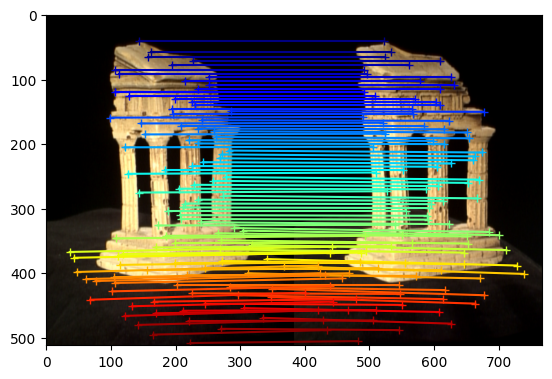

In [19]:
n_viz = 100
num_matches = matches_im0.shape[0]
match_idx_to_viz = np.round(np.linspace(0, num_matches - 1, n_viz)).astype(int)
viz_matches_im0, viz_matches_im1 = matches_im0[match_idx_to_viz], matches_im1[match_idx_to_viz]

image_mean = torch.as_tensor([0.5, 0.5, 0.5], device='cpu').reshape(1, 3, 1, 1)
image_std = torch.as_tensor([0.5, 0.5, 0.5], device='cpu').reshape(1, 3, 1, 1)

viz_imgs = []
for i, view in enumerate([view1, view2]):
    rgb_tensor = view['img'] * image_std + image_mean
    viz_imgs.append(rgb_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy())

H0, W0, H1, W1 = *viz_imgs[0].shape[:2], *viz_imgs[1].shape[:2]
img0 = np.pad(viz_imgs[0], ((0, max(H1 - H0, 0)), (0, 0), (0, 0)), 'constant', constant_values=0)
img1 = np.pad(viz_imgs[1], ((0, max(H0 - H1, 0)), (0, 0), (0, 0)), 'constant', constant_values=0)
img = np.concatenate((img0, img1), axis=1)
pl.figure()
pl.imshow(img)
cmap = pl.get_cmap('jet')
for i in range(n_viz):
    (x0, y0), (x1, y1) = viz_matches_im0[i].T, viz_matches_im1[i].T
    pl.plot([x0, x1 + W0], [y0, y1], '-+', color=cmap(i / (n_viz - 1)), scalex=False, scaley=False)
pl.show(block=True)

In [22]:

matches_im0
matches_im1
matches_im0_3d = pred1['pts3d'][0, matches_im0[:,1], matches_im0[:,0]]
matches_im1_3d = pred1['pts3d'][0, matches_im1[:,1], matches_im1[:,0]]

# Save 2D matches
torch.save(matches_im0, 'matches_im0.pt')
torch.save(matches_im1, 'matches_im1.pt')


# Save 3D coordinates
torch.save(matches_im0_3d, 'matches_im0_3d.pt')
torch.save(matches_im1_3d, 'matches_im1_3d.pt')

# Convert to numpy if needed (for torch tensors)
matches_im0_np = matches_im0.cpu().numpy() if torch.is_tensor(matches_im0) else matches_im0
matches_im1_np = matches_im1.cpu().numpy() if torch.is_tensor(matches_im1) else matches_im1

# Save all arrays in compressed format
np.savez_compressed('matches_data.npz',
                    matches_im0=matches_im0_np,
                    matches_im1=matches_im1_np,
                    matches_im0_3d=matches_im0_3d,
                    matches_im1_3d=matches_im1_3d)

# Deeper examination of other solution approaches
Mast3r gives us an estimate of 2d/2d correspondances and their associated 3d points in each camera frame. We've already written the code to call the model on the Temple image used in the main HW1, and we've provided 2d and 3d points below. Your job is going to be to collect data on the runtime, condition number (of the design matrix), and reprojection error for the SVD, QR, Pseudoinverse, and LU methods of obtaining the projection matrix. The [condition number](https://en.wikipedia.org/wiki/Condition_number) is a useful metric for telling us how 'well behaved' a matrix is for solving these kinds of equations. Heuristically speaking, it tells us how sensitive the output is in relation to small changes of the inputs. Well conditioned $A$ matrices have low condition numbers, and tend to be numerically more stable, where as pooly conditioned matrices tend to have the opposite characteristics.

Your task is to do the following:

1.   Select 10 different quantities of correspondances to sample (note: there must be sufficient number of correspondances to obtain a solution, but not so many that repeated trials/samples dont degenerate into the entire set of correspondances).
2.   For each chosen quantity N, randomly select those N correspondances from the total set of correspondances (without replacement), and determine the runtime, condition number (as determined by [np.linalg.cond](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html) of the $A$ matrix), and reprojection error of the four methods discussed earlier. Refer to the earlier cells to show the perferred way of measuring function runtime in python.
3. Generate figures describing the important relationships for the relevant metrics for each method. How does each method trade off condition vs. accuracy? How does each method scale with respect to number of correspondances? Generate whatever figures you most prefer, but provide provide textual analysis describing your results. In general, describe how each method performed and how your results might influence your choice of solver going forward.



In [32]:
# contains the image x,y and camera space x,y,z points of the valid correspondances
matches_im0
matches_im1
matches_im0_3d = pred1['pts3d'][0, matches_im0[:,1], matches_im0[:,0]]
matches_im1_3d = pred1['pts3d'][0, matches_im1[:,1], matches_im1[:,0]]

# perform sampling of the correspondances, and track the relevant metrics for each experimental run

####################################
##########YOUR CODE HERE############
####################################
n_total = 72360

# I have to generate 10 samples
sample_sizes = [8, 20, 50, 100, 300, 500, 1000, 3000, 5000, 10000]

metrics = {

}

# Sample without replacement
for itr, sample_size in enumerate(sample_sizes):

    print("*"*50)
    print("Iteration: ", itr+1, " Sample Size: ", sample_size)

    metrics[f"Sample Size: {sample_size}"] = {

    }

    # Generate unique random indices
    indices = np.random.choice(n_total, size=sample_size, replace=False)

    # Create corresponding samples using advanced indexing
    pts2d_img0 = matches_im0[indices]  # Shape (sample_size, 2)
    pts3d_img0 = matches_im0_3d[indices]  # Shape (sample_size, 3)

    pts2d_img1 = matches_im1[indices]  # Shape (sample_size, 2)
    pts3d_img1 = matches_im1_3d[indices]  # Shape (sample_size, 3)

    i = 0
    for pts2d, pts3d in [(pts2d_img0, pts3d_img0), (pts2d_img1, pts3d_img1)]:
      print("For image points in image: ",  i+1)
      i = i+1

      qr_start = time.perf_counter_ns()
      P_qr = calculate_projection_QR(pts2d,pts3d)
      qr_end = time.perf_counter_ns()
      print(f"qr_start: {qr_start}, qr_end: {qr_end}")

      svd_start = time.perf_counter_ns()
      P = calculate_projection(pts2d,pts3d)
      svd_end = time.perf_counter_ns()
      print(f"svd_start: {svd_start}, svd_end: {svd_end}")

      pinv_start = time.perf_counter_ns()
      P_pinv = calculate_projection_pseudoinverse(pts2d, pts3d)
      pinv_end = time.perf_counter_ns()
      print(f"pinv_start: {pinv_start}, pinv_end: {pinv_end}")

      LU_start = time.perf_counter_ns()
      P_LU = calculate_projection_LU(pts2d, pts3d)
      LU_end = time.perf_counter_ns()
      print(f"LU_start: {pinv_start}, LU_end: {pinv_end}")

      reprojection_error = calculate_reprojection_error(pts2d, pts3d, P)
      reprojection_error_qr = calculate_reprojection_error(pts2d, pts3d, P_qr)
      reprojection_error_pinv = calculate_reprojection_error(pts2d, pts3d, P_pinv)
      reprojection_error_lu = calculate_reprojection_error(pts2d, pts3d, P_LU)

      A = create_design_matrix(pts2d, pts3d)
      cond_num = np.linalg.cond(A)

      print("Condition Number ", cond_num)

      print("Reprojection Error SVD: ", reprojection_error)
      print("Reprojection Error QR: ", reprojection_error_qr)
      print("Reprojection Error LU: ", reprojection_error_lu)
      print("Reprojection Error PINV: ", reprojection_error_pinv)

      metrics[f"Sample Size: {sample_size}"][f"Image {i}"] = {
          "reprojection_error_SVD": reprojection_error,
          "reprojection_error_QR": reprojection_error_qr,
          "reprojection_error_LU": reprojection_error_lu,
          "reprojection_error_PInv": reprojection_error_pinv,
          "time_svd": svd_end-svd_start,
          "time_qr": qr_end-qr_start,
          "time_pinv": pinv_end-pinv_start,
          "time_lu": LU_end-LU_start,
          "Sample Size": sample_size,
          "Condition Number": cond_num,


      }



####################################

**************************************************
Iteration:  1  Sample Size:  8
For image points in image:  1
qr_start: 4957597749743, qr_end: 4957600135014
svd_start: 4957600165855, svd_end: 4957602119876
pinv_start: 4957602163854, pinv_end: 4957603779301
LU_start: 4957602163854, LU_end: 4957603779301
Condition Number  3555810.373657885
Reprojection Error SVD:  0.16725337590739237
Reprojection Error QR:  12.416357829668367
Reprojection Error LU:  12.416357837237669
Reprojection Error PINV:  12.416359171284736
For image points in image:  2
qr_start: 4957611863833, qr_end: 4957613774087
svd_start: 4957613808684, svd_end: 4957615608205
pinv_start: 4957615639887, pinv_end: 4957619305860
LU_start: 4957615639887, LU_end: 4957619305860
Condition Number  1534742.7550672926
Reprojection Error SVD:  0.470311327945177
Reprojection Error QR:  11.703724888997513
Reprojection Error LU:  11.703724895113858
Reprojection Error PINV:  11.703724955099617
***********************************************

<ipython-input-6-313528b728ae>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  M[i] = (qt_b[i] - np.dot(R[i, i+1:n], M[i+1:n])) / R[i, i]
<ipython-input-7-3db196658e39>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = b[i] - np.dot(L[i, :i], y[:i])


889404.6348623717
Reprojection Error SVD:  0.6037841958363641
Reprojection Error QR:  43.41460352779379
Reprojection Error LU:  43.41460351492428
Reprojection Error PINV:  43.414603158389355
**************************************************
Iteration:  4  Sample Size:  100
For image points in image:  1
qr_start: 4957802050008, qr_end: 4957827997495
svd_start: 4957828060288, svd_end: 4957847652140
pinv_start: 4957847713840, pinv_end: 4957867310639
LU_start: 4957847713840, LU_end: 4957867310639
Condition Number  1209854.3124267703
Reprojection Error SVD:  0.5735359815116804
Reprojection Error QR:  11.977979734822348
Reprojection Error LU:  11.977979697811854
Reprojection Error PINV:  11.977979882350343
For image points in image:  2
qr_start: 4957908842107, qr_end: 4957932292567
svd_start: 4957932337187, svd_end: 4957952268589
pinv_start: 4957952330266, pinv_end: 4957971427274
LU_start: 4957952330266, LU_end: 4957971427274
Condition Number  1219048.1788542464
Reprojection Error SVD:  0.5

In [5]:
import matplotlib.pyplot as pl
plt=pl
# Extract all unique sample sizes sorted numerically
sample_sizes = sorted(int(k.split(": ")[1]) for k in metrics.keys())

# Create plots for each image
for image_num in [0, 1]:
    fig, axs = plt.subplots(3, 3, figsize=(16, 12))
    fig.suptitle(f'Performance Metrics Analysis - Image {image_num}', fontsize=14, y=1.02)

    # Flatten axes array for easier iteration
    axes = axs.flatten()

    # Metrics to plot (excluding sample size and condition number)
    metrics_to_plot = [
        'reprojection_error_SVD',
        'reprojection_error_QR',
        'reprojection_error_LU',
        'reprojection_error_PInv',
        'time_svd',
        'time_qr',
        'time_lu',
        'time_pinv',
        'Condition Number'
    ]

    # Collect data for each metric
    data = {metric: [] for metric in metrics_to_plot}
    cond_numbers = []

    for size in sample_sizes:
        # print(metrics[f"Sample Size: {size}"].keys())
        entry = metrics[f"Sample Size: {size}"][f"Image {image_num+1}"]
        for metric in metrics_to_plot:
            data[metric].append(entry[metric])

    # Plot each metric
    for idx, metric in enumerate(metrics_to_plot):
        ax = axes[idx]

        ax.plot(sample_sizes, data[metric], 'o-', linewidth=2, markersize=8)
        ax.set_title(metric.replace('_', ' ').title())
        ax.set_xlabel('Sample Size', fontsize=10)
        y_label = 'Error Value' if 'reprojection' in metric else 'Condition Number'
        if 'time' in metric:
           y_label = "Time (NS)"
        ax.set_ylabel(y_label, fontsize=10)
        ax.grid(True, alpha=0.3)

        if metric == 'Condition Number':
            ax.set_yscale('log')
            ax.set_ylabel('Log Scale Value')

        # Format x-axis with proper thousands separators
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Hide empty subplot
    if len(metrics_to_plot) < len(axes):
        axes[-1].axis('off')

    plt.tight_layout()
    # plt.show()
    plt.savefig('plots.png', dpi=300)

NameError: name 'metrics' is not defined

# Results analysis
After 3D reconstruction using MAST3R, we observe the lowest error when using SVD. The errors produced by the other three methods are similar to each other but significantly higher than SVD, indicating that SVD is the superior method for computing projection matrices.  

However, the computation time presents a different perspective. SVD takes nearly ten times longer than the other methods, which have similar processing times. Despite this, I prefer to wait longer and obtain a more accurate projection matrix with SVD. This is not a major issue, as the best error for SVD occurs at 3,000 samples, requiring less than 0.2 × 10¹⁰ ns (2 seconds) for projection matrix computation—an acceptable processing time.  

Additionally, the condition number of the matrices decreases as the number of samples increases and eventually saturates. This suggests that adding more points beyond a certain threshold does not significantly impact matrix sensitivity. In fact, using 1,000–3,000 points with SVD appears to yield the best results while maintaining reasonable computation time.

# Final 3D Reconstruction

Finally, using the same 2d/3d correspondances frome above (matches_im0, matches_im1, matches_im0_3d, matches_im1_3d), compute the 3d reconstruction as before in the original HW1. Take the same 2d points in each image from HW1 and compare the original reconstruction to the new one obtained using Mast3r. How do they compare?

In [5]:
import pickle

plt 

def visualize(point_cloud, save_path=None):
    """
    Visualize and save 3D point cloud data
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        point_cloud[:, 0],
        point_cloud[:, 1],
        point_cloud[:, 2],
        c=point_cloud[:, 2],
        cmap='viridis',
        s=10,
        alpha=0.7
    )

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    fig.colorbar(scatter, ax=ax, label='Depth (Z)')
    ax.view_init(elev=-72, azim=-127, roll=36)

    if save_path:
        # Save in multiple formats
        plt.savefig(f'{save_path}.png')  # Static image
        with open(f'{save_path}.pkl', 'wb') as f:
            pickle.dump(fig, f)
        np.save(f'{save_path}_data.npy', point_cloud)  # Raw data

    plt.show()
    plt.close()

# Usage
# visualize(matches_im0_3d, save_path='graph1')

In [3]:
import cv2
import os
import sys
import numpy as np
import matplotlib.pyplot as plt




def compute_fundamental_matrix(pts1, pts2, scale):
    """
    Compute the Fundamental matrix from corresponding 2D points in two images.

    Given two sets of corresponding 2D image points from Image 1 (pts1) and Image 2 (pts2),
    as well as a scaling factor (scale) representing the maximum dimension of the images, 
    this function calculates the Fundamental matrix.

    Parameters:
    pts1 (numpy.ndarray): An Nx2 array containing 2D points from Image 1.
    pts2 (numpy.ndarray): An Nx2 array containing 2D points from Image 2, corresponding to pts1.
    scale (float): The maximum dimension of the images, used for scaling the Fundamental matrix.

    Returns:
    F (numpy.ndarray): A 3x3 Fundamental matrix 
    """
    F = None
    ####################################
    ##########YOUR CODE HERE############
    ####################################
    
    # Epipolar Constraint: https://www.youtube.com/watch?v=6kpBqfgSPRc&list=PL2zRqk16wsdoCCLpou-dGo7QQNks1Ppzo&index=8
    # Constraint Equation: w1^T * E * w2 = 0
    # w2 = [x2, y2, z2], w1 = [x1, y1, z1]
    # E = Essential Matrix = Skew_Symmetric(t) * R
    # But we only have 2D points, so we need to calculate the Fundamental Matrix
    # Solving the for w2 and w1, we get the equation: x1.T * F * x2 = 0
    # F = K1.inv().T * E * K2
    # K1, K2 are the intrinsic matrices of the two cameras [KNOWN!]
    # This is the epipolar constraint equation. 
    # We are trying to find the Fundamental matrix that satisfies this equation for all the points.
    # We need at least 8 points to solve for the Fundamental matrix.
    # Fundamental matrix constraint: norm should be 1.
    
    
    # How to estimate Fundamental matrix: https://www.youtube.com/watch?v=izpYAwJ0Hlw&list=PL2zRqk16wsdoCCLpou-dGo7QQNks1Ppzo&index=10
    
    # Check the pseudocode here: https://sites.cc.gatech.edu/classes/AY2016/cs4476_fall/results/proj3/html/jhan320/index.html#:~:text=Therefore%2C%20the%20fundamental%20matrix%20must,%2C%20resulting%20in%20U%20%CE%A3V'.
    # Constructing the A matrix (watch the video above)
    
    # Study scaling strategy here: https://www5.cs.fau.de/fileadmin/lectures/2014s/Lecture.2014s.IMIP/exercises/4/exercise4.pdf
    
    # center_1 = np.mean(pts1, axis=0)
    # center_2 = np.mean(pts2, axis=0)
    
    # original_pts1 = pts1.copy()
    # original_pts2 = pts2.copy()
    
    # T1 = np.array([
    #     [1/scale, 0, -center_1[0]/scale],
    #     [0, 1/scale, -center_1[1]/scale],
    #     [0, 0, 1]
    # ])
    
    # T2 = np.array([
    #     [1/scale, 0, -center_2[0]/scale],
    #     [0, 1/scale, -center_2[1]/scale],
    #     [0, 0, 1]
    # ])
    
    # # pts1 = T1 * pts1
    # # pts2 = T2 * pts2
    # pts1 = np.dot(T1, np.hstack((pts1, np.ones((pts1.shape[0], 1)))).T).T[:, :2]
    # pts2 = np.dot(T2, np.hstack((pts2, np.ones((pts2.shape[0], 1)))).T).T[:, :2]
    
    # A = np.zeros((pts1.shape[0], 9))
    # for i in range(pts1.shape[0]):
    #    A[i] = [
    #         pts1[i, 0] * pts2[i, 0],  # Points_a(i, 1) * Points_b(i, 1)
    #         pts1[i, 1] * pts2[i, 0],  # Points_a(i, 2) * Points_b(i, 1)
    #         pts2[i, 0],               # Points_b(i, 1)
    #         pts1[i, 0] * pts2[i, 1],  # Points_a(i, 1) * Points_b(i, 2)
    #         pts1[i, 1] * pts2[i, 1],  # Points_a(i, 2) * Points_b(i, 2)
    #         pts2[i, 1],               # Points_b(i, 2)
    #         pts1[i, 0],               # Points_a(i, 1)
    #         pts1[i, 1],               # Points_a(i, 2)
    #         1                         # 1
    # ]
        
    # # Solve for the Fundamental matrix. Least squares solution. Last column of V is the solution.
    
    # _, _, V = np.linalg.svd(A)
    # F = V[-1].reshape(3, 3)

    # # Fundamental matrix is rank 2. So, we need to enforce this constraint.
    # U_f, S_f, V_f = np.linalg.svd(F)
    
    # S_f[2] = 0
    
    # F = np.dot(U_f, np.dot(np.diag(S_f), V_f))
    
    
    # # Denormalize the Fundamental matrix
    # F = np.dot(T2.T, np.dot(F, T1))
    ####################################
    
    # Above translation not working for some reason. So, using the below code.
    pts1 = pts1 / scale
    pts2 = pts2 / scale

    # Construct matrix A
    A = np.zeros((pts1.shape[0], 9))
    for i in range(pts1.shape[0]):
        x1, y1 = pts1[i]
        x2, y2 = pts2[i]
        A[i] = [
            x1 * x2, y1 * x2, x2,
            x1 * y2, y1 * y2, y2,
            x1, y1, 1
        ]

    # Solve for F using SVD
    _, _, V = np.linalg.svd(A)
    F = V[-1].reshape(3, 3)

    # Enforce rank-2 constraint
    U, S, Vt = np.linalg.svd(F)
    S[2] = 0
    F = U @ np.diag(S) @ Vt

    # Denormalize F using scaling matrices
    T = np.array([[1/scale, 0, 0],
                  [0, 1/scale, 0],
                  [0, 0, 1]])
    F = T.T @ F @ T  # Denormalize
    
    return F 

def compute_epipolar_correspondences(img1, img2, pts1, F):
    """
    Compute epipolar correspondences in Image 2 for a set of points in Image 1 using the Fundamental matrix.

    Given two images (img1 and img2), a set of 2D points (pts1) in Image 1, and the Fundamental matrix (F)
    that relates the two images, this function calculates the corresponding 2D points (pts2) in Image 2.
    The computed pts2 are the epipolar correspondences for the input pts1.

    Parameters:
    img1 (numpy.ndarray): The first image containing the points in pts1.
    img2 (numpy.ndarray): The second image for which epipolar correspondences will be computed.
    pts1 (numpy.ndarray): An Nx2 array of 2D points in Image 1.
    F (numpy.ndarray): The 3x3 Fundamental matrix that relates img1 and img2.

    Returns:
    pts2_ep (numpy.ndarray): An Nx2 array of corresponding 2D points (pts2) in Image 2, serving as epipolar correspondences
                   to the points in Image 1 (pts1).
    """
    pts2_ep = None
    ####################################
    ##########YOUR CODE HERE############
    ####################################
    
    # To find dense correspondences, we need to find the epipolar lines in the second image.
    # Watch this video: https://www.youtube.com/watch?v=erpiFudDBlg&list=PL2zRqk16wsdoCCLpou-dGo7QQNks1Ppzo&index=11
    
    # The epipolar line in the second image is given by: l2 = F * x1 (We need the fundamental matrix to find the epipolar line)
    # Given point x1 in image 1 and the fundamental matrix F, we can find the epipolar line in the second image.
    # The corresponding point x2 in the second image should lie on this line.
    
    # epipolar line equation is given Lx2 = 0, where L = F * x1
    # Point x2 should lie on this line. All points on this line are the epipolar correspondences of x1.
    
    # To find the dense match, perform a 1-D search along the epipolar line, and find
    # minimum( img1[x1] - img2[x2] )^2
    
    # Construct the epipolar lines
    
    ## Personal Notes:
    # 1. Compute the epipolar lines in the second image. It is F @ x1
    # 2. For each column idx in the second image, find the y coordinate of the point on the line in the second image.
    # 3. Check if the point is within the image bounds.
    # 4. If it is within the image bounds, take a small window around the point and find the best match.
    # 5. The best match is the point that has the minimum squared difference with the point in the first image.
    
    
    pts2_ep = np.zeros((pts1.shape[0], 2))
    
    for i in range(pts1.shape[0]):
        x1 = np.array([pts1[i, 0], pts1[i, 1], 1])
        # l2 is F.T * x1
        l2 = F @ x1 #np.dot(F, x1)
        s = np.sqrt(l2[0]**2 + l2[1]**2)
        # import pdb; pdb.set_trace()
        if s == 0:
            print('Zero line vector in Epipolar lines')
            continue
        # l2 = l2 / s

        
        # for all points that are on the line l2, and within the image bounds, find the best match
        # along the line.
        
        best_x2 = None
        best_y2 = None
        
        best_square_diff = float('inf')
        
        for j in range(img2.shape[1]):
            x = j
            if l2[1] != 0:
                y = -(l2[0] * x + l2[2]) / l2[1]
            else:
                y = 0
            
            x = int(x)
            y = int(y)
            # import pdb; pdb.set_trace()
            # check if x, y is within the image bounds
            if x >= 0 and x < img2.shape[1] and y >= 0 and y < img2.shape[0]:
                # take a small window around x, y and find the best match
                window_size = 5
                # check if the window is within the image bounds
                if x - window_size < 0 or x + window_size >= img2.shape[1] or y - window_size < 0 or y + window_size >= img2.shape[0]:
                    continue
                    window_size = min(x, img2.shape[1] - x, y, img2.shape[0] - y)
                    
                # # find the best match in the window
                # square_diff = np.sum((img1[pts1[i, 1] - window_size:pts1[i, 1] + window_size, pts1[i, 0] - window_size:pts1[i, 0] + window_size] - img2[y - window_size:y + window_size, x - window_size:x + window_size])**2)
                
                # compute manhattan distance for window_size in both images
                image_1_window = img1[pts1[i, 1] - window_size:pts1[i, 1] + window_size, pts1[i, 0] - window_size:pts1[i, 0] + window_size]
                image_2_window = img2[y - window_size:y + window_size, x - window_size:x + window_size]
                
                diff = np.abs((np.array(image_2_window).astype(np.float32) -  np.array(image_1_window).astype(np.float32)))
                
                manhattan_distance = np.sum(diff)
                
                
                distance_between_coords = np.abs(x - pts1[i, 1]) + np.abs(y - pts1[i, 0])
                
                square_diff = manhattan_distance #+ distance_between_coords
                
                # import pdb; pdb.set_trace()
                if square_diff < best_square_diff:
                    best_square_diff = square_diff
                    best_x2 = x
                    best_y2 = y
         
        assert best_x2 is not None           
        pts2_ep[i] = [best_x2, best_y2]        
   
    # import pdb; pdb.set_trace()
    ####################################
    return pts2_ep

def compute_essential_matrix(K1, K2, F):
    """
    Compute the Essential matrix from the intrinsic matrices and the Fundamental matrix.

    Given the intrinsic matrices of two cameras (K1 and K2) and the 3x3 Fundamental matrix (F) that relates
    the two camera views, this function calculates the Essential matrix (E).

    Parameters:
    K1 (numpy.ndarray): The 3x3 intrinsic matrix for Camera 1.
    K2 (numpy.ndarray): The 3x3 intrinsic matrix for Camera 2.
    F (numpy.ndarray): The 3x3 Fundamental matrix that relates Camera 1 and Camera 2.

    Returns:
    E (numpy.ndarray): The 3x3 Essential matrix (E) that encodes the essential geometric relationship between
                   the two cameras.

    """
    E = None
    ####################################
    ##########YOUR CODE HERE############
    ####################################
    # Epipolar Constraint: https://www.youtube.com/watch?v=6kpBqfgSPRc&list=PL2zRqk16wsdoCCLpou-dGo7QQNks1Ppzo&index=8
    # Constraint Equation: w1^T * E * w2 = 0
    # w2 = [x2, y2, z2], w1 = [x1, y1, z1]
    # E = Essential Matrix = Skew_Symmetric(t) * R
    # But we only have 2D points, so we need to calculate the Fundamental Matrix
    # Solving the for w2 and w1, we get the equation: x1.T * F * x2 = 0
    # F = K1.inv().T * E * K2
    # K1, K2 are the intrinsic matrices of the two cameras [KNOWN!]
    # This is the epipolar constraint equation. 
    # We are trying to find the Fundamental matrix that satisfies this equation for all the points.
    # We need at least 8 points to solve for the Fundamental matrix.
    # Fundamental matrix constraint: norm should be 1.
    
    # Decompose F to get E
    # F = K2.T.inv() * E * K1.inv()
    # Formula for E
    # E = np.matmul(K2.T, np.matmul(F, K1))
    
    # Another way is to use k1 before k2. It depends on how you are solvig the equation.
    E = np.matmul(K1.T, np.matmul(F, K2))
    
    ####################################
    return E 

def triangulate_points(E, pts1_ep, pts2_ep, K1, K2):
    """
    Triangulate 3D points from the Essential matrix and corresponding 2D points in two images.

    Given the Essential matrix (E) that encodes the essential geometric relationship between two cameras,
    a set of 2D points (pts1_ep) in Image 1, and their corresponding epipolar correspondences in Image 2
    (pts2_ep), this function calculates the 3D coordinates of the corresponding 3D points using triangulation.

    Extrinsic matrix for camera1 is assumed to be Identity. 
    Extrinsic matrix for camera2 can be found by cv2.decomposeEssentialMat(). Note that it returns 2 Rotation and 
    one Translation matrix that can form 4 extrinsic matrices. Choose the one with the most number of points in front of 
    the camera.

    Parameters:
    E (numpy.ndarray): The 3x3 Essential matrix that relates two camera views.
    pts1_ep (numpy.ndarray): An Nx2 array of 2D points in Image 1.
    pts2_ep (numpy.ndarray): An Nx2 array of 2D points in Image 2, corresponding to pts1_ep.

    Returns:
    point_cloud (numpy.ndarray): An Nx3 array representing the 3D point cloud, where each row contains the 3D coordinates
                   of a triangulated point.
    point_cloud_cv (numpy.ndarray): An Nx3 array representing the 3D point cloud, where each row contains the 3D coordinates
                   of a triangulated point calculated using cv2.triangulate
    """
    
    # Refer this video https://www.youtube.com/watch?v=OYwm4VM6uNg&list=PL2zRqk16wsdoCCLpou-dGo7QQNks1Ppzo&index=12
    
    point_cloud = None
    point_cloud_cv = None
    ####################################
    ##########YOUR CODE HERE############
    ####################################
    
    # Step 1. Use the Essential matrix to get the Rotation and Translation matrices.
    U_e, S_e, VT_e = np.linalg.svd(E)
    W = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])
    R1 = np.dot(U_e, np.dot(W, VT_e))
    R2 = np.dot(U_e, np.dot(W.T, VT_e))
    
    t1 = U_e[:, 2]
    t2 = -U_e[:, 2]
    
    
    # Step 2. Construct 4 possible extrinsic matrices for camera 2
    possible_extrinsic_matrices = [
        np.hstack((R1, t1.reshape(3, 1))),
        np.hstack((R1, t2.reshape(3, 1))),
        np.hstack((R2, t1.reshape(3, 1))),
        np.hstack((R2, t2.reshape(3, 1)))
    ]
    
    # for each of these extrinsic matrices, construct the projection matrix for camera 2
    camera_2_projection_matrices = []
    for extrinsic_matrix in possible_extrinsic_matrices:
        camera_2_projection_matrices.append(np.dot(K2, extrinsic_matrix))
        
    camera_1_projection_matrix = np.dot(K1, np.hstack((np.eye(3), np.zeros((3, 1)))))
    
    # Solve Ax = 0, where A is the matrix of the form:
    # Row 1: pts1_ep[0, 0] * P1[2, :] - P1[0, :]
    # Row 2: pts1_ep[0, 1] * P1[2, :] - P1[1, :]
    # Row 3: pts2_ep[0, 0] * P2[2, :] - P2[0, :]
    # Row 4: pts2_ep[0, 1] * P2[2, :] - P2[1, :]
    # x is the 3D point in real world coordinates
    
    computed_3d_points = {
        0: [],
        1: [],
        2: [],
        3: [],
    }
    
    points_clouds = {
        0: [],
        1: [],
        2: [],
        3: [],
    }
    
    
    for projection_idx, P2 in enumerate(camera_2_projection_matrices):
        for i in range(pts1_ep.shape[0]):
            # compute the A matrix for each point, and solve for x
            # x is the 3D point in real world coordinates
            A = np.zeros((4, 4))
            A[0] = pts1_ep[i, 0] * camera_1_projection_matrix[2, :] - camera_1_projection_matrix[0, :]
            A[1] = pts1_ep[i, 1] * camera_1_projection_matrix[2, :] - camera_1_projection_matrix[1, :]
            A[2] = pts2_ep[i, 0] * P2[2, :] - P2[0, :]
            A[3] = pts2_ep[i, 1] * P2[2, :] - P2[1, :]
            
            # import pdb; pdb.set_trace()
            
            try:
                _, _, V = np.linalg.svd(A)
            except np.linalg.LinAlgError:
                continue
            x = V[-1]
            
            x = x / x[3]
            
            # import pdb; pdb.set_trace()
            
            # Reproject the 3D point to image 1 and image 2, compute the reprojection error
            x2_reprojected = np.dot(P2, x)
            
            x2_reprojected = x2_reprojected / x2_reprojected[2]
            
            
            computed_3d_points[projection_idx].append((x, x2_reprojected[:2]))
            
            # Append the 3D point to the point cloud
            points_clouds[projection_idx].append(x)
            
    # import pdb; pdb.set_trace()
            
    # Compute the reprojection error for each of the 3D points
    best_error = float('inf')
    best_error_idx = None
    
    for key in computed_3d_points.keys():
        # the first element of the tuple is the 3D point, and the second element is the reprojected 2D point
        pts_2_reprojected = np.array([x[1] for x in computed_3d_points[key]])
        
        pts_2d = np.array(pts2_ep).astype(np.float32)
        # import pdb; pdb.set_trace()
        
        # import pdb; pdb.set_trace()
        error = np.linalg.norm(pts_2d - pts_2_reprojected, axis=1)
        
        error = np.mean(error)
        
        print("For Projection Matrix: ", key, " Error: ", error)
        
        # import pdb; pdb.set_trace()
        
        # error = np.linalg.norm(pts_2d - pts_2_predicted, axis=1)
        
        if error < best_error:
            best_error = error
            best_error_idx = key
            
    best_error = 1
    
    print("Extrinsic Matrix: ", possible_extrinsic_matrices[best_error_idx])
    
    print("Extrinsic Matrix 0: ", possible_extrinsic_matrices[0])
            
    point_cloud = np.array(points_clouds[best_error_idx])
    
    # Triangulate using cv2.triangulate
    # Modified CV2 triangulation and error calculation section
    point_cloud_cv = []
    cv2_reprojections = []
    
    import pdb; pdb.set_trace()
    cv2_point_cloud = cv2.triangulatePoints(camera_1_projection_matrix, 
                                              camera_2_projection_matrices[best_error_idx], 
                                              pts1_ep.T, pts2_ep.T)
    for i in range(pts1_ep.shape[0]):
        
        # Project the 3D point back to image 2
        point_3d_homog = cv2_point_cloud.T[i].reshape(4, 1)
        proj_2 = np.dot(camera_2_projection_matrices[best_error_idx], point_3d_homog)
        proj_2 = proj_2 / proj_2[2]  # Normalize by z-coordinate
        cv2_reprojections.append(proj_2[:2].flatten())
        
    # import pdb; pdb.set_trace()

    point_cloud_cv = cv2_point_cloud.T / cv2_point_cloud.T[3] #np.array(point_cloud_cv)
    cv2_reprojections = np.array(cv2_reprojections).astype(np.float32)

    # Calculate reprojection error
    error = np.mean(np.linalg.norm(pts2_ep - cv2_reprojections, axis=1))
    
    # error = np.mean(error)
    print("CV2 Triangulation Error: ", error)
        
    
                        
    point_cloud_cv = np.array(point_cloud_cv)
    point_cloud_cv = point_cloud_cv / point_cloud_cv[3]
    
    # point_cloud_cv = point_cloud_cv.T[:, :3]
    
    ####################################

    return point_cloud, point_cloud_cv


def visualize(point_cloud, return_fig=False):
    """
    Function to visualize 3D point clouds
    Parameters:
    point_cloud (numpy.ndarray): An Nx3 array representing the 3D point cloud,where each row contains the 3D coordinates
                   of a triangulated point.
    """
    ####################################
    ##########YOUR CODE HERE############
    ####################################
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], c=point_cloud[:, 2],
        cmap='viridis',
        s=10,
        alpha=0.7)
    ax.view_init(elev=-72, azim=-67, roll=36)
    
    if return_fig:
        return fig, ax
    else:
        plt.show()
    
    ####################################




For Projection Matrix:  0  Error:  0.8927557006318219
For Projection Matrix:  1  Error:  0.8927557006318219
For Projection Matrix:  2  Error:  0.8927569005047018
For Projection Matrix:  3  Error:  0.8927569005047018
Extrinsic Matrix:  [[-9.42840000e-01  3.50009612e-02 -3.31402576e-01 -9.90250997e-01]
 [-3.31090227e-02 -9.99387243e-01 -1.13547793e-02 -2.52198558e-02]
 [ 3.31596935e-01 -2.66675284e-04 -9.43421116e-01  1.36992414e-01]]
Extrinsic Matrix 0:  [[-9.42840000e-01  3.50009612e-02 -3.31402576e-01 -9.90250997e-01]
 [-3.31090227e-02 -9.99387243e-01 -1.13547793e-02 -2.52198558e-02]
 [ 3.31596935e-01 -2.66675284e-04 -9.43421116e-01  1.36992414e-01]]
> /var/folders/cx/tssspzpj4xxfhsqpl5j5p5n80000gn/T/ipykernel_33417/235615760.py(454)triangulate_points()
    452 
    453     import pdb; pdb.set_trace()
--> 454     cv2_point_cloud = cv2.triangulatePoints(camera_1_projection_matrix, 
    455                                               camera_2_projection_matrices[best_error_idx],
    4

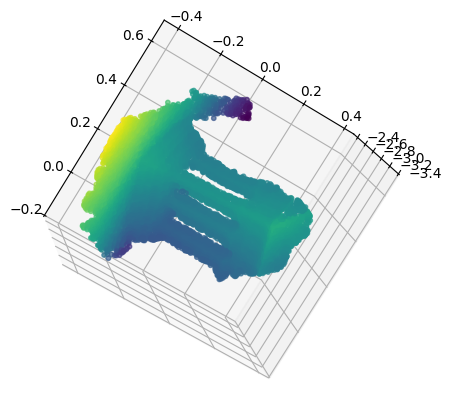

In [4]:
import torch
# Q6 extended
import sys
import os
# sys.path.append('~/Projects/UMich/3D-robot-perception/HW1/src/')
sys.path.append('UMich/3D-robot-perception/HW1/src/')

# from ..src.sparse_reconstruction import compute_fundamental_matrix, compute_essential_matrix, triangulate_points
# from src.sparse_reconstruction import visualize as visualize_3d

# contains the image x,y and camera space x,y,z points of the valid correspondances
matches_im0 = torch.load('matches_im0.pt')
matches_im1 = torch.load('matches_im1.pt')

# perform sampling of the correspondances, and track the relevant metrics for each experimental run

####################################
##########YOUR CODE HERE############
####################################
n_total = 72360

# I have to generate 10 samples
sample_size_for_viz = 10000

data_for_intrinsics = np.load("/Users/sanyam/Projects/UMich/3D-robot-perception/HW1/src/data/intrinsics.npz")
K1 = data_for_intrinsics['K1']
K2 = data_for_intrinsics['K2']

sample_size_for_F = 100


indices_for_F = np.random.choice(n_total, size=sample_size_for_F, replace=False)
pts2d_img0_for_F = matches_im0[indices_for_F]  # Shape (sample_size, 2)
pts2d_img1_for_F = matches_im1[indices_for_F]  # Shape (sample_size, 2)

img1 = cv2.imread('/Users/sanyam/Projects/UMich/3D-robot-perception/HW1/src/data/im1.png')
img2 = cv2.imread('/Users/sanyam/Projects/UMich/3D-robot-perception/HW1/src/data/im2.png')
scale = max(img1.shape)
    
# compute the F matrix
F = compute_fundamental_matrix(
        pts2d_img0_for_F, 
        pts2d_img1_for_F, 
        scale
    )

E = compute_essential_matrix(
        K1, 
        K2, 
        F
    )

indices = np.random.choice(n_total, size=sample_size_for_viz, replace=False)

# Create corresponding samples using advanced indexing
pts2d_img0 = matches_im0[indices]  # Shape (sample_size, 2)
pts2d_img1 = matches_im1[indices]  # Shape (sample_size, 2)

point_cloud, point_cloud_cv = triangulate_points(
        E, 
        pts2d_img0, 
        pts2d_img1, 
        K1, 
        K2
    )


visualize(point_cloud, return_fig=False)
# visualize(point_cloud, save_path='graph2')


**Discussion - My Notes**


In [6]:
import torch
# Q6 extended
import sys
import os
# sys.path.append('~/Projects/UMich/3D-robot-perception/HW1/src/')
sys.path.append('UMich/3D-robot-perception/HW1/src/')

# from ..src.sparse_reconstruction import compute_fundamental_matrix, compute_essential_matrix, triangulate_points
# from src.sparse_reconstruction import visualize as visualize_3d

# contains the image x,y and camera space x,y,z points of the valid correspondances
matches_im0 = torch.load('matches_im0.pt')
matches_im1 = torch.load('matches_im1.pt')

# perform sampling of the correspondances, and track the relevant metrics for each experimental run

####################################
##########YOUR CODE HERE############
####################################
n_total = 72360

# I have to generate 10 samples
sample_size_for_viz = 10000

data_for_intrinsics = np.load("/Users/sanyam/Projects/UMich/3D-robot-perception/HW1/src/data/intrinsics.npz")
K1 = data_for_intrinsics['K1']
K2 = data_for_intrinsics['K2']

sample_size_for_F = 100


indices_for_F = np.random.choice(n_total, size=sample_size_for_F, replace=False)
pts2d_img0_for_F = matches_im0[indices_for_F]  # Shape (sample_size, 2)
pts2d_img1_for_F = matches_im1[indices_for_F]  # Shape (sample_size, 2)

img1 = cv2.imread('/Users/sanyam/Projects/UMich/3D-robot-perception/HW1/src/data/im1.png')
img2 = cv2.imread('/Users/sanyam/Projects/UMich/3D-robot-perception/HW1/src/data/im2.png')
scale = max(img1.shape)
    
# compute the F matrix
F = compute_fundamental_matrix(
        pts2d_img0_for_F, 
        pts2d_img1_for_F, 
        scale
    )

E = compute_essential_matrix(
        K1, 
        K2, 
        F
    )

indices = np.random.choice(n_total, size=sample_size_for_viz, replace=False)

# Create corresponding samples using advanced indexing
pts2d_img0 = matches_im0[indices]  # Shape (sample_size, 2)
pts2d_img1 = matches_im1[indices]  # Shape (sample_size, 2)

point_cloud, point_cloud_cv = triangulate_points(
        E, 
        pts2d_img0, 
        pts2d_img1, 
        K1, 
        K2
    )


visualize(point_cloud, return_fig=False)
# visualize(point_cloud, save_path='graph2')


For Projection Matrix:  0  Error:  0.40893397140071164
For Projection Matrix:  1  Error:  0.40893397140071164
For Projection Matrix:  2  Error:  0.40893405097710245
For Projection Matrix:  3  Error:  0.40893405097710245
Extrinsic Matrix:  [[-0.94131894  0.03298959 -0.33590229 -0.99362497]
 [-0.03069097 -0.99945506 -0.01215119 -0.02925593]
 [ 0.33612011  0.00112898 -0.94181845  0.10887383]]
Extrinsic Matrix 0:  [[-0.94131894  0.03298959 -0.33590229 -0.99362497]
 [-0.03069097 -0.99945506 -0.01215119 -0.02925593]
 [ 0.33612011  0.00112898 -0.94181845  0.10887383]]
> /var/folders/cx/tssspzpj4xxfhsqpl5j5p5n80000gn/T/ipykernel_32334/2755072600.py(454)triangulate_points()
    452 
    453     import pdb; pdb.set_trace()
--> 454     cv2_point_cloud = cv2.triangulatePoints(camera_1_projection_matrix, 
    455                                               camera_2_projection_matrices[best_error_idx],
    456                                               pts1_ep.T, pts2_ep.T)



: 

### Put your textural analysis comparing your original reconstruction to the Mast3r derived one here


The 3D reconstruction produced by the classical computer vision algorithm we implemented is much sparser compared to MAST3R. This is because we use predefined correspondences, whereas the MAST3R algorithm identifies dense correspondences and reconstructs a more detailed graph.  

Additionally, MAST3R's 3D reconstruction is more accurate and better represents the original scene structure. This is because the classical computer vision method we use breaks the reconstruction into multiple steps, with each step introducing noise that accumulates. In contrast, MAST3R performs the entire reconstruction in a single step, resulting in lower error.

